<a href="https://colab.research.google.com/github/Kuldeep2003-exe/googleAi/blob/main/Day4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

5.2


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
Predicted output for x = 7: 3.21


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


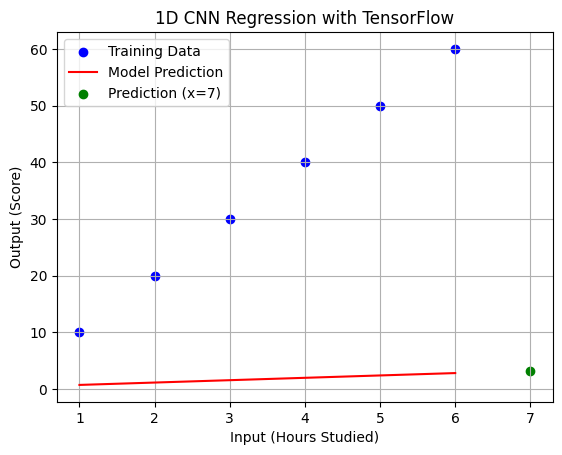

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

x_train = np.array([1, 2, 3, 4, 5, 6], dtype=float).reshape((6, 1, 1))
y_train = np.array([10, 20, 30, 40, 50, 60], dtype=float)

model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=4, kernel_size=1, activation='relu', input_shape=(1, 1)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=200, verbose=0)

x_test = np.array([7.0]).reshape((1, 1, 1))
y_pred = model.predict(x_test)
print(f"Predicted output for x = 7: {y_pred[0][0]:.2f}")

plt.scatter(x_train.flatten(), y_train, color='blue', label='Training Data')
plt.plot(x_train.flatten(), model.predict(x_train).flatten(), color='red', label='Model Prediction')
plt.scatter(x_test.flatten(), y_pred.flatten(), color='green', label='Prediction (x=7)')
plt.xlabel("Input (Hours Studied)")
plt.ylabel("Output (Score)")
plt.title("1D CNN Regression with TensorFlow")
plt.legend()
plt.grid(True)
plt.show()


In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt

In [7]:

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()


X_train = X_train.reshape(-1, 28, 28, 1) / 255.0
X_test = X_test.reshape(-1, 28, 28, 1) / 255.0

In [9]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
optimizer = RMSprop(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

5.4 Fashion MNIST – Modified Neural Network with Scaled Outputs

a. Try different scaling strategies (e.g., modifying logits before softmax).

b. Add a custom layer or function to simulate uncertainty or confidence adjustments.


In [13]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

logits_scale = 1.5

inputs = tf.keras.Input(shape=(28, 28, 1))
x = tf.keras.layers.Conv2D(32, (3,3), activation='relu')(inputs)
x = tf.keras.layers.MaxPooling2D(2,2)(x)
x = tf.keras.layers.Conv2D(64, (3,3), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2,2)(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
logits = tf.keras.layers.Dense(10)(x)
scaled_logits = tf.keras.layers.Lambda(lambda z: z * logits_scale)(logits)
outputs = tf.keras.layers.Softmax()(scaled_logits)
model_scaled_logits = tf.keras.Model(inputs=inputs, outputs=outputs)
model_scaled_logits.compile(optimizer='adam',
                            loss='sparse_categorical_crossentropy',
                            metrics=['accuracy'])
model_scaled_logits.fit(train_images, train_labels, epochs=5)
test_loss, test_acc = model_scaled_logits.evaluate(test_images, test_labels)
print(f"Test Accuracy with scaled logits: {test_acc * 100:.2f}%")

class UncertaintyLayer(tf.keras.layers.Layer):
    def __init__(self):
        super().__init__()
        self.log_var = self.add_weight(name='log_var', shape=(), initializer='zeros', trainable=True)
    def call(self, inputs, training=None):
        if training:
            noise = tf.random.normal(tf.shape(inputs), mean=0.0, stddev=tf.exp(0.5 * self.log_var))
            return inputs + noise
        else:
            return inputs

inputs = tf.keras.Input(shape=(28, 28, 1))
x = tf.keras.layers.Conv2D(32, (3,3), activation='relu')(inputs)
x = tf.keras.layers.MaxPooling2D(2,2)(x)
x = tf.keras.layers.Conv2D(64, (3,3), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2,2)(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
logits = tf.keras.layers.Dense(10)(x)
logits_with_uncertainty = UncertaintyLayer()(logits)
outputs = tf.keras.layers.Softmax()(logits_with_uncertainty)
model_uncertainty = tf.keras.Model(inputs=inputs, outputs=outputs)
model_uncertainty.compile(optimizer='adam',
                          loss='sparse_categorical_crossentropy',
                          metrics=['accuracy'])
model_uncertainty.fit(train_images, train_labels, epochs=5)
test_loss, test_acc = model_uncertainty.evaluate(test_images, test_labels)
print(f"Test Accuracy with uncertainty layer: {test_acc * 100:.2f}%")


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 29ms/step - accuracy: 0.7912 - loss: 0.5846
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 29ms/step - accuracy: 0.8899 - loss: 0.2967
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 29ms/step - accuracy: 0.9083 - loss: 0.2479
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.9214 - loss: 0.2143
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.9301 - loss: 0.1892
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9037 - loss: 0.2726
Test Accuracy with scaled logits: 90.60%
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 29ms/step - accuracy: 0.7337 - loss: 0.7537
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 29ms/step - accuracy: 0.8754 - loss: 0.3400
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 29ms/step - accuracy: 0.8983 - loss: 0.2754
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9142 - loss: 0.2322
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 29ms/step - accuracy: 0.9235 - loss: 0

In [14]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images.reshape(-1, 28, 28, 1) / 255.0
test_images = test_images.reshape(-1, 28, 28, 1) / 255.0

train_labels_cat = tf.one_hot(train_labels, depth=10)
test_labels_cat = tf.one_hot(test_labels, depth=10)

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
])

inputs = tf.keras.Input(shape=(28, 28, 1))
x = data_augmentation(inputs)
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2, 2)(x)
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2, 2)(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
outputs = tf.keras.layers.Dense(10, activation='sigmoid')(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = tf.keras.callbacks.ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

history = model.fit(train_images, train_labels_cat, epochs=20, validation_split=0.1,
                    callbacks=[early_stop, checkpoint])

test_loss, test_accuracy = model.evaluate(test_images, test_labels_cat)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

predictions = model.predict(test_images)
pred_labels = np.argmax(predictions, axis=1)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

def display_prediction(index):
    plt.imshow(test_images[index].reshape(28, 28), cmap=plt.cm.binary)
    plt.title(f"Prediction: {class_names[pred_labels[index]]} | Actual: {class_names[test_labels[index]]}")
    plt.axis('off')
    plt.show()

display_prediction(44)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

cm = confusion_matrix(test_labels, pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(test_labels, pred_labels, target_names=class_names))


Epoch 1/20
1687/1688 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6419 - loss: 0.1725

1688/1688 ━━━━━━━━━━━━━━━━━━━━ 60s 35ms/step - accuracy: 0.6420 - loss: 0.1724 - val_accuracy: 0.7855 - val_loss: 0.1019
Epoch 2/20
 239/1688 ━━━━━━━━━━━━━━━━━━━━ 42s 30ms/step - accuracy: 0.8019 - loss: 0.0977

KeyboardInterrupt: 